In [1]:
import cv2
import yolov5
import os 
model = yolov5.load('Assets/yolov5s.pt')
from PIL import Image

YOLOv5  2023-5-15 Python-3.10.11 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 2080, 8192MiB)

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients
Adding AutoShape... 


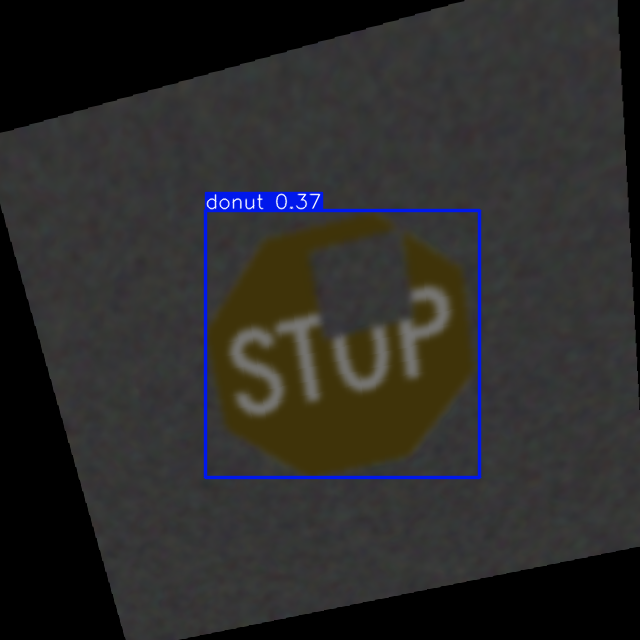

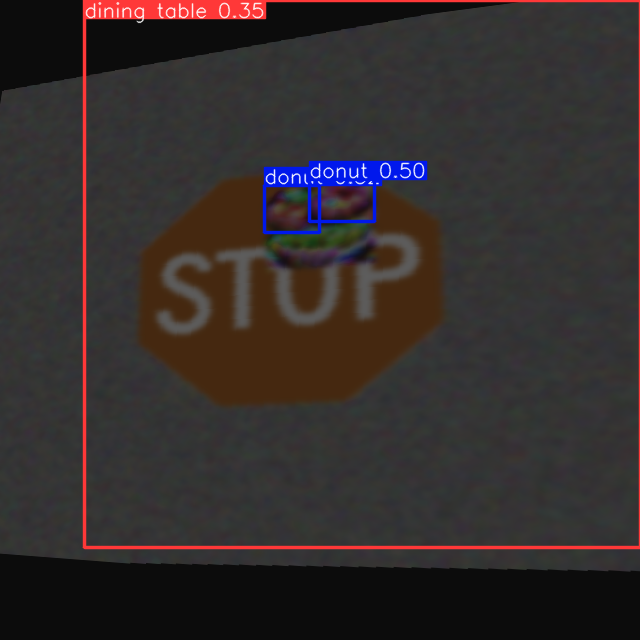

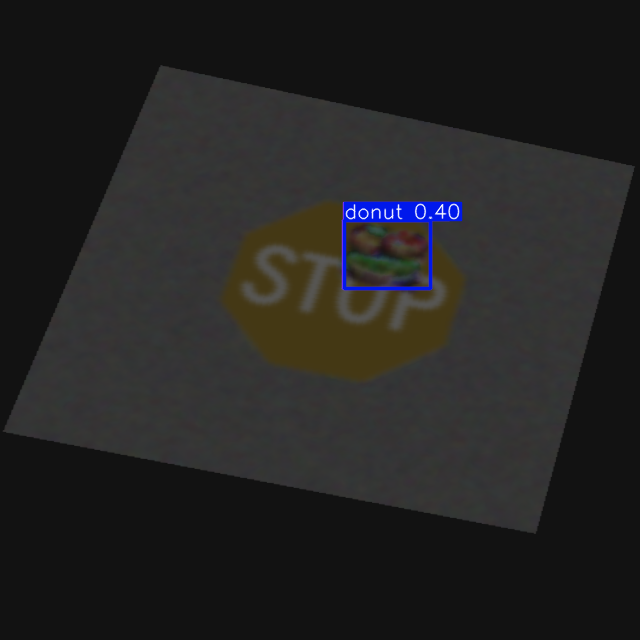

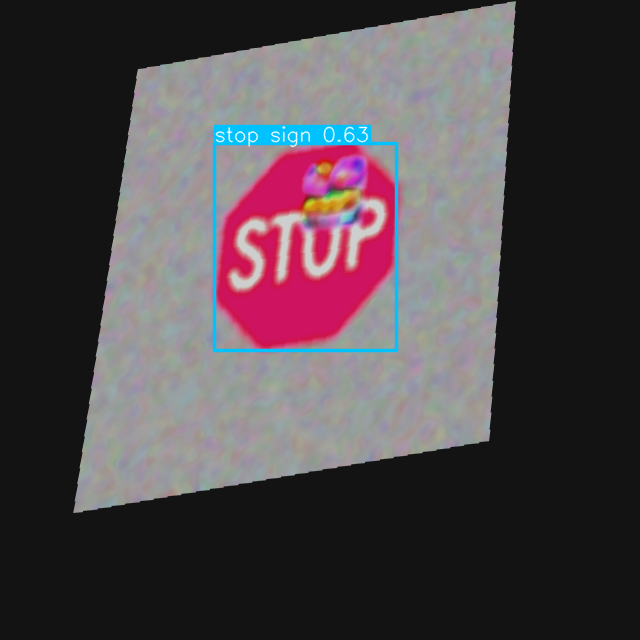

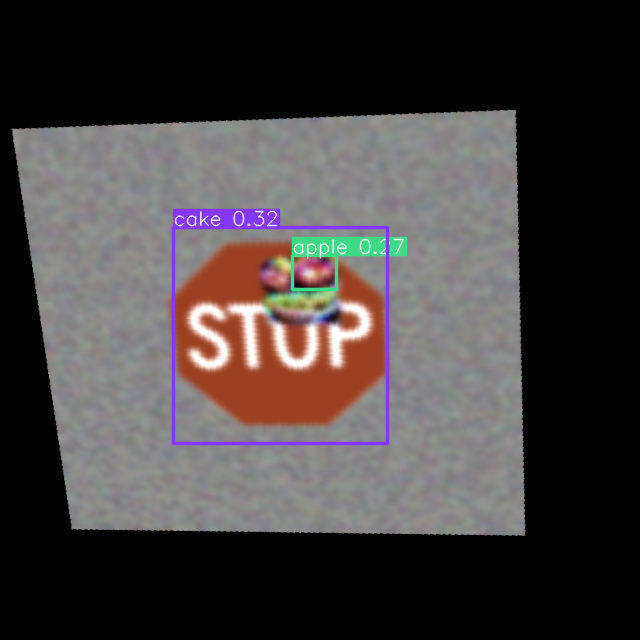

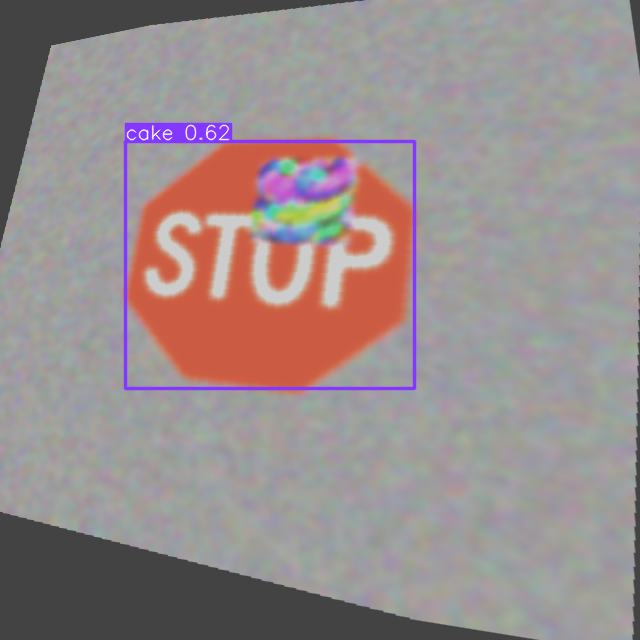

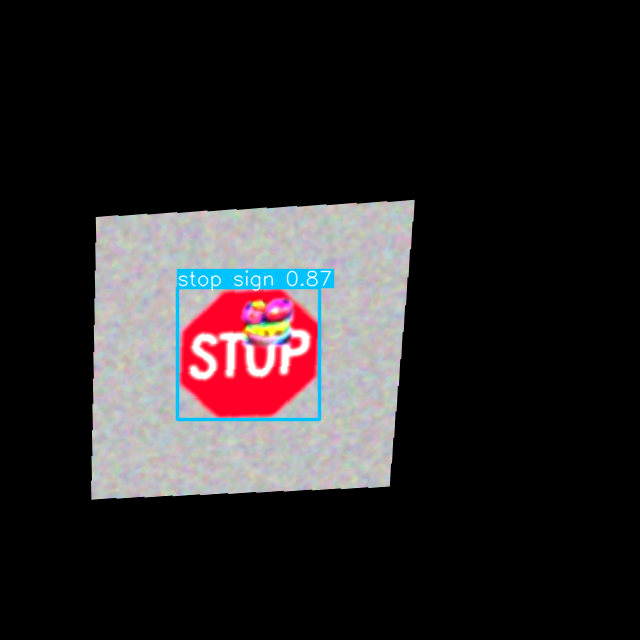

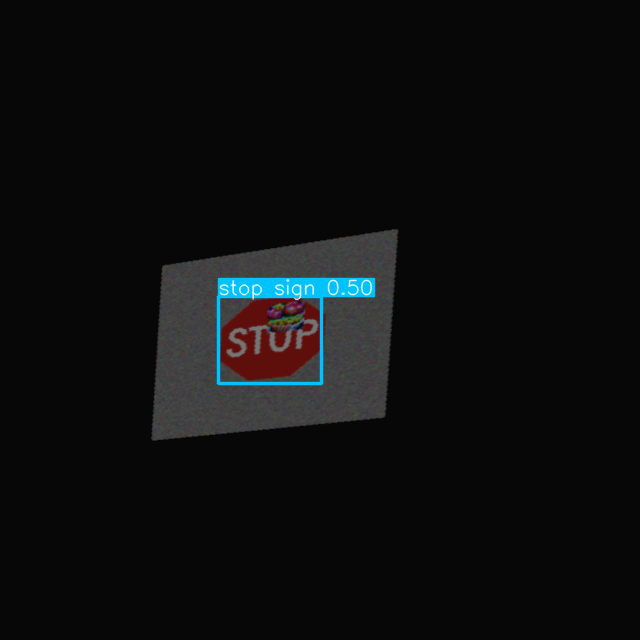

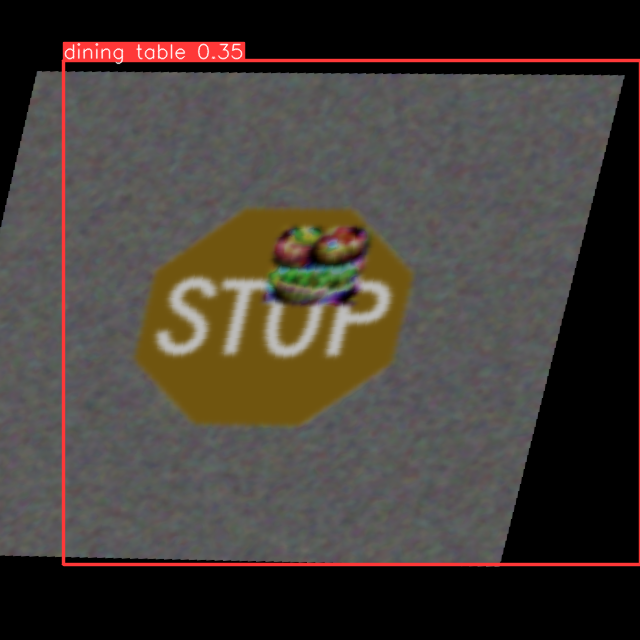

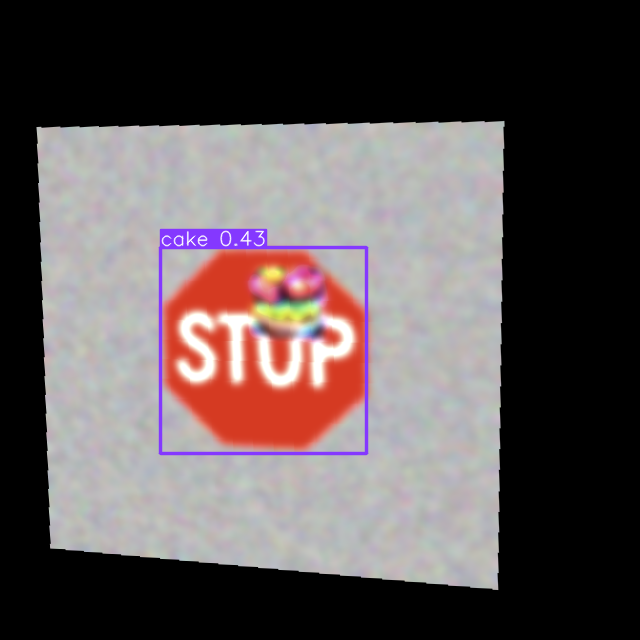

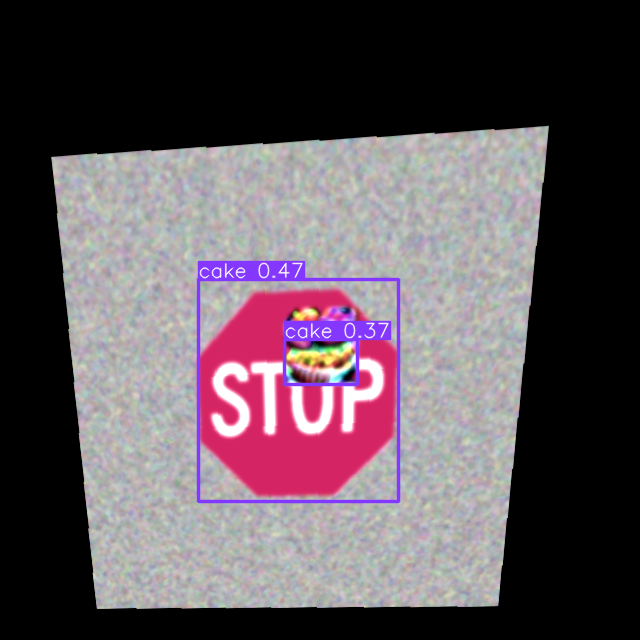

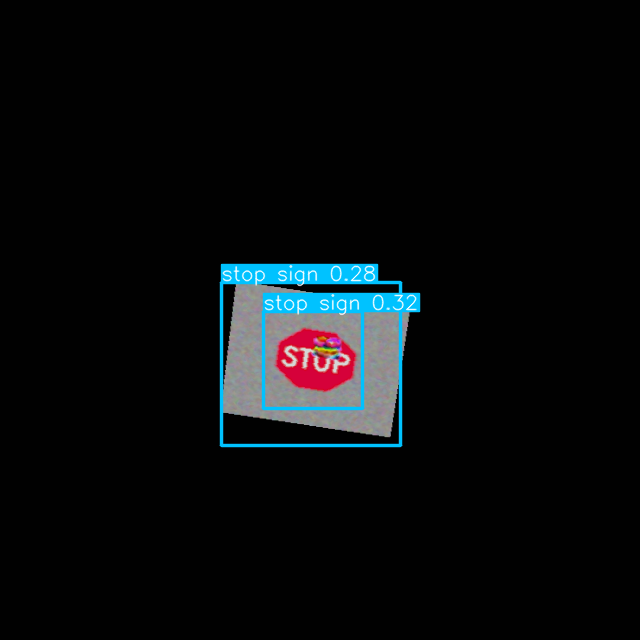

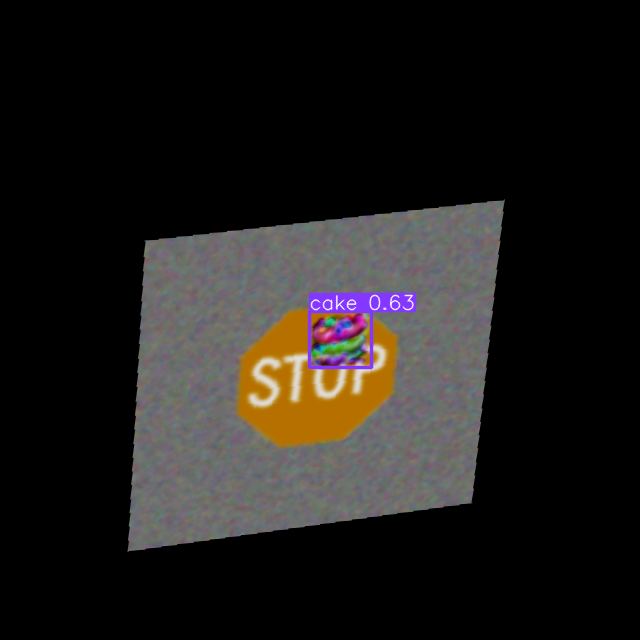

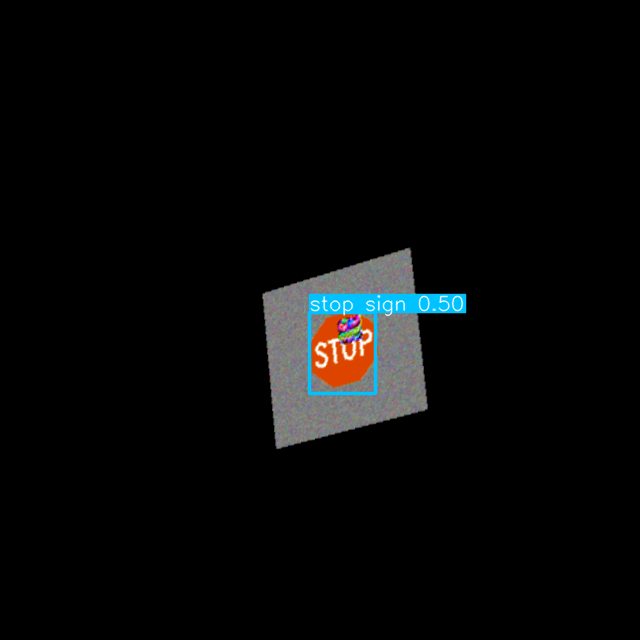

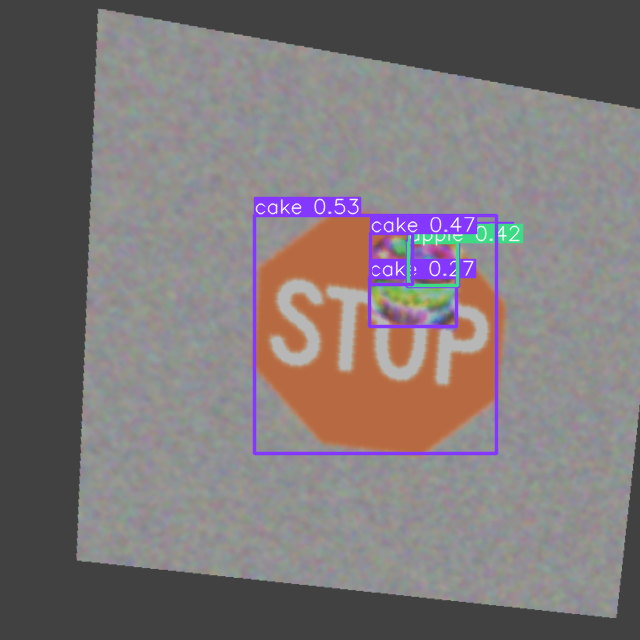

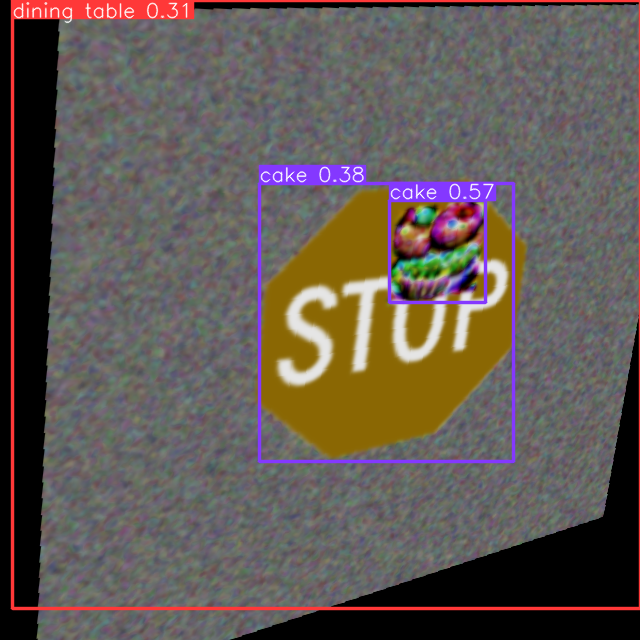

In [2]:
img_path = "C:\\Users\\Devon\\Project\\NewPatchGen\\outputs\\2023-09-23\\15-58-11\\outputs"

isExist = os.path.exists(img_path+'/dectected')
if not isExist:
    os.makedirs(img_path+'/dectected')

for filename in os.listdir(img_path):
    #  check if the file is an image
    if not filename.endswith(".png"):
        continue
    img = os.path.join(img_path, filename)
    results = model(img)

    # parse results
    predictions = results.pred[0]
    boxes = predictions[:, :4] # x1, y1, x2, y2
    scores = predictions[:, 4]
    categories = predictions[:, 5]

    # show detection bounding boxes on image
    results.show()

    # Render the results on the original image
    img_with_boxes = results.render()[0]

    img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)


    save_dir = os.path.dirname(img)+'/dectected/'+os.path.basename(img).split('.')[0]+'_detections.png'
    cv2.imwrite(save_dir, img_with_boxes_rgb)


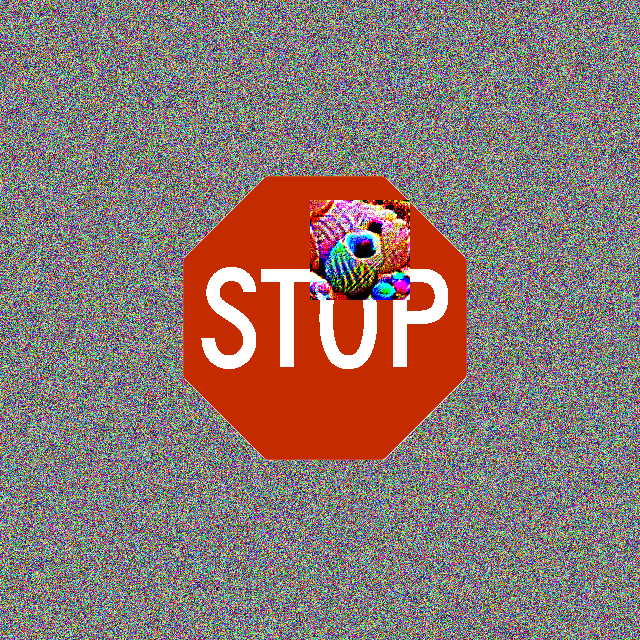

C:\Users\Devon\Project\NewPatchGen\outputs\2023-09-19\23-58-09\Patch/final_patched_detections.png


True

In [11]:
img_path = 'C:\\Users\\Devon\\Project\\NewPatchGen\\outputs\\2023-09-19\\23-58-09\\Patch\\final_patched.png'
img = Image.open(img_path)
# img = img.rotate(180)
results = model(img)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

# Render the results on the original image
img_with_boxes = results.render()[0]

img_with_boxes_rgb = cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB)


save_dir = os.path.dirname(img_path)+'/'+os.path.basename(img_path).split('.')[0]+'_detections.png'
print(save_dir)
cv2.imwrite(save_dir, img_with_boxes_rgb)

tensor([0.65770, 0.47375, 0.26928], device='cuda:0')
tensor([11., 74.,  9.], device='cuda:0')


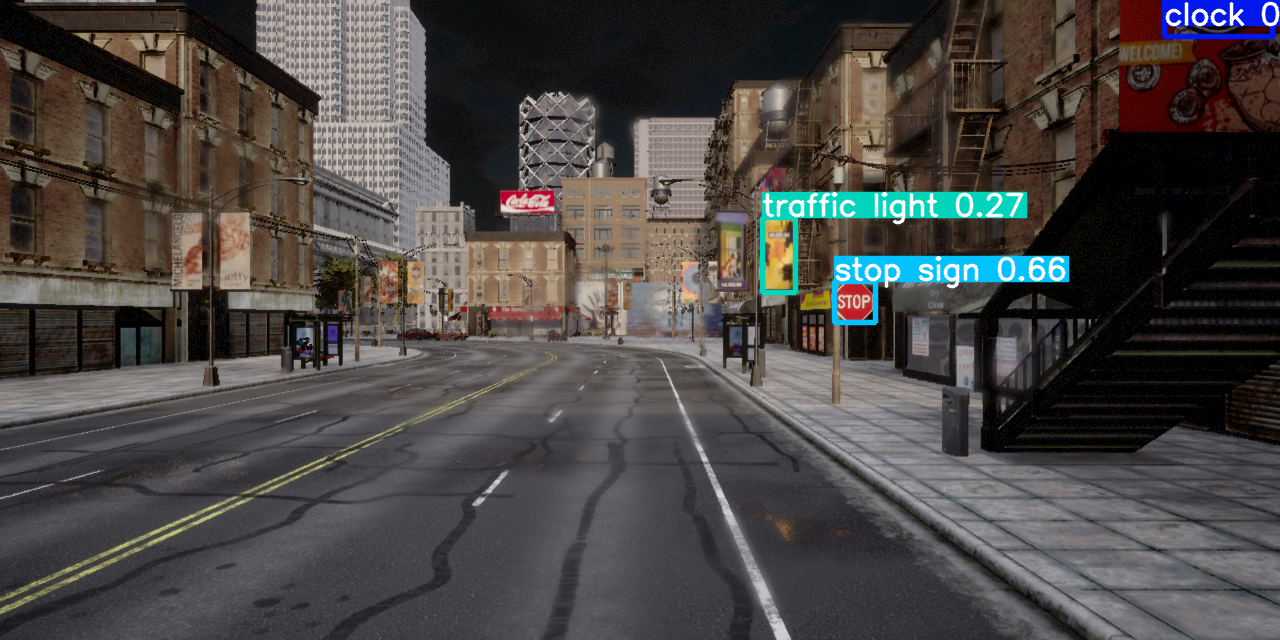

In [13]:
img = "C:\\Users\\Devon\\Project\\carlaAttack\\outputs\\carla_data_saver\\2023-07-18_17-20-07\\_out2\\sensor.camera.rgb.26\\00000001.png"

results = model(img)

# parse results
predictions = results.pred[0]
print(predictions[:, 4])
boxes = predictions[:, :4] # x1, y1, x2, y2

scores = predictions[:, 4]

print(predictions[:, 5])
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

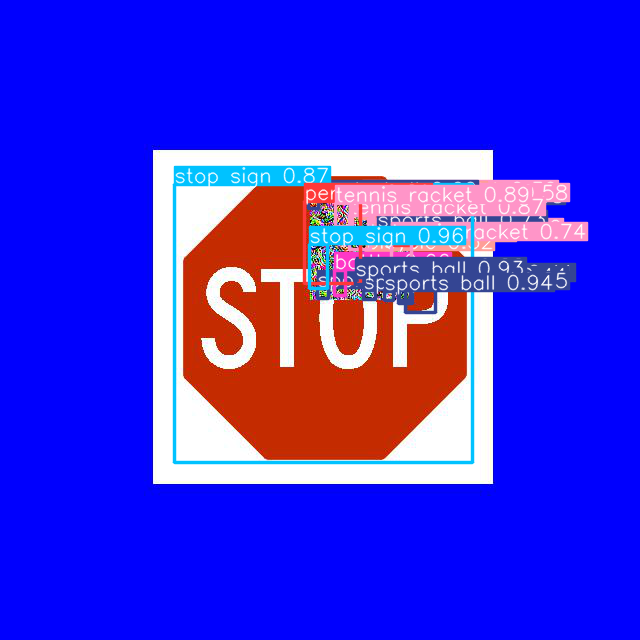

Saved 1 image to C:\Users\Devon\Project\carlaAttack\outputs\2023-07-18\17-48-54\Patch\Patched_image_detections.jpg


In [6]:
img = "C:\\Users\\Devon\\Project\\carlaAttack\\outputs\\2023-07-18\\17-48-54\\Patch\\Patched_image.jpeg"



results = model(img)

# parse results
predictions = results.pred[0]
boxes = predictions[:, :4] # x1, y1, x2, y2
scores = predictions[:, 4]
categories = predictions[:, 5]

# show detection bounding boxes on image
results.show()

save_dir = os.path.dirname(img)+'/'+os.path.basename(img).split('.')[0]+'_detections.jpg'
results.save(save_dir=save_dir)